In [1]:
import torch, torch.nn as nn, torch.optim as optim

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
train_ds = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = transform
)
test_ds = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = transform
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.14MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.63MB/s]


In [5]:
train_loader = DataLoader(train_ds, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_ds, batch_size = 64, shuffle = False)

torch.Size([64, 1, 28, 28])


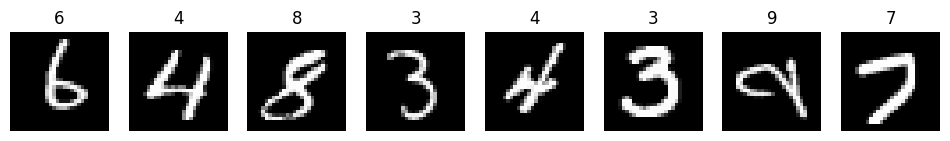

In [6]:
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))
print(images.size())
images = images[:8].squeeze()
fig, axes = plt.subplots(1,8,figsize=(12,2))
for ax, img, lbl in zip(axes, images, labels):
  ax.imshow(img, cmap = 'gray')
  ax.set_title(lbl.item())
  ax.axis('off')
plt.show()

In [7]:
model = nn.Sequential(nn.Flatten(),nn.Linear(28*28,128), nn.ReLU(), nn.Linear(128,64), nn.ReLU(), nn.Linear(64,10)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [42]:
class MLP(nn.Module):
  def __init__(self, in_dim = 28*28, num_classes = 10):
    super().__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(in_dim, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, num_classes)

  def forward(self, x):
    x = self.flatten(x)
    x = self.fc1(x)
    x = nn.ReLU()(x)
    x = self.fc2(x)
    x = nn.ReLU()(x)
    x = self.fc3(x)
    return x

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

convolutional

In [43]:
class CNN(nn.Module):
  def __init__(self, in_channels=1):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=3, stride=1,padding=2)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1,padding=1)
    self.pool = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(1568, 128)
    self.fc2 = nn.Linear(128, 10)
  def forward(self, x):
    x = self.conv1(x)
    x = nn.ReLU()(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = nn.ReLU()(x)
    x = self.pool(x)
    x = x.view(-1, 1568)
    #print(x.size())
    x = self.fc1(x)
    x = nn.ReLU()(x)
    x = self.fc2(x)
    return x

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

0.2 0.3 0.1 0.3 0.5 0.7

In [ ]:
def train_epoch(model, loader):
  model.train()
  running_loss = 0
  for X,y in loader:
    X,y = X.to(device),y.to(device)
    optimizer.zero_grad()
    pred = model(X)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*X.size(0)
  return running_loss/len(loader.dataset)

def eval_epoch(model, loader):
  model.eval()
  correct = 0
  with torch.no_grad():
    for X, y in loader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      prediction = pred.argmax(dim = 1)
      correct += (prediction == y).sum().item()
  return correct/len(loader.dataset)



for epoch in range(5):
  loss = train_epoch(model,train_loader)
  accuracy = eval_epoch(model,test_loader)
  print(f"Epoch: {epoch+1}, Loss: {loss:.4f}, Accuracy: {accuracy}")



Epoch: 1, Loss: 0.6283, Accuracy: 0.9392
Epoch: 2, Loss: 0.1710, Accuracy: 0.9584
